In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [2]:
metadata_dir = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"

metadata_dirs = glob.glob(metadata_dir+"*_individuals.txt")

df_l = []
for d in metadata_dirs:
    # Identify IDs
    dir_metadata = pd.read_csv(d, sep="\t")
    df_l.append(dir_metadata)
all_inds = pd.concat(df_l)

In [3]:
all_inds10x = all_inds.loc[all_inds.AVG_COVERAGE_A >= 10]

In [4]:
len(all_inds10x.SPECIES.unique())

250

In [5]:
df_l = []
for s in all_inds10x.GVCF_FOLDER.value_counts().index[:]:
    s_df = all_inds10x.loc[all_inds10x.GVCF_FOLDER == s]
    f_c = len(s_df.loc[s_df.GENETIC_SEX == "F"])
    m_c = len(s_df.loc[s_df.GENETIC_SEX == "M"])
    if f_c == 0:
        continue
    # Read het df
    het_df_path = "../results/window_stats/{}_100kb_het.txt".format(s)
    if os.path.exists("../results/window_stats/{}_100kb_het.txt".format(s)):
        het_df = pd.read_csv(het_df_path, sep="\t")
    else:
        print("Not present:", s)
        continue
    het_df = het_df.loc[het_df.GVCF_ID.isin(s_df.loc[s_df.GENETIC_SEX == "F"].GVCF_ID) &
                        (het_df.callable_frac > 0.9) &
                       (~het_df.het.isna())]
    if sum(het_df.chr_type == "chrX") < 10 or sum(het_df.chr_type == "aut") < 10:
        print("Too little data", s)
        continue
    df_l.append(het_df)
all_het_df = pd.concat(df_l)

Not present: Macaca_mulatta_ssp
Too little data Eulemur_mongoz_ssp
Too little data Eulemur_rubriventer_ssp
Too little data Eulemur_macaco_ssp
Too little data Eulemur_flavifrons_ssp
Too little data Eulemur_coronatus_ssp
Too little data Lepilemur_ankaranensis_ssp
Too little data Varecia_rubra_ssp
Too little data Otolemur_crassicaudatus_ssp
Too little data Galago_senegalensis_ssp
Not present: Pithecia_pissinatti_ssp
Too little data Perodicticus_potto_ssp
Too little data Lepilemur_ruficaudatus_ssp
Too little data Callimico_goeldii_ssp
Too little data Indri_indri_ssp
Too little data Alouatta_palliata_ssp
Too little data Microcebus_arnholdi_ssp
Too little data Semnopithecus_schistaceus_ssp
Too little data Lepilemur_dorsalis_ssp
Too little data Semnopithecus_priam_ssp
Too little data Mirza_coquereli_ssp
Too little data Lepilemur_mustelinus_ssp
Too little data Lepilemur_sahamalazensis_ssp
Too little data Lepilemur_mittermeieri_ssp
Too little data Trachypithecus_pileatus_ssp
Too little data Arc

In [6]:
len(all_inds10x.GVCF_ID.unique()), len(all_inds10x.GVCF_FOLDER.unique())

(2024, 263)

In [7]:
all_inds10x.loc[~(all_inds10x.AVG_COVERAGE_X.isna() | (all_inds10x.AVG_COVERAGE_X == "Unknown")) ]

,BIOSAMPLE_ID,PDGP_ID,GVCF_ID,SRA_SAMPLE_ID,BIOPROJECT_ID,BAM_FOLDER,GVCF_FOLDER,REFERENCE_FOLDER,GENUS,SPECIES,SUBSPECIES,REPORTED_SEX,GENETIC_SEX,AVG_COVERAGE_A,PROP_COVERED_A,AVG_COVERAGE_X,PROP_COVERED_X,AVG_COVERAGE_Y,PROP_COVERED_Y
0,SAMEA112482833,PD_0040,PD_0040,ERS14600184,PRJEB59576,Lophocebus_aterrimus_ssp,Lophocebus_aterrimus_ssp,Papio_anubis_ssp,Lophocebus,aterrimus,ssp,M,M,34.526,0.986,17.702,0.963,27.281,0.924
1,SAMEA115292508,SAMEA115292508,SAMEA115292508,ERS18276634,PRJEB72259,Lophocebus_aterrimus_ssp,Lophocebus_aterrimus_ssp,Papio_anubis_ssp,Lophocebus,aterrimus,ssp,Unknown,M,33.343,0.986,17.381,0.963,24.179,0.925
2,SAMN23530509,SAMN23530509,SAMN23530509,SRS11219902,PRJNA785018,Lophocebus_aterrimus_ssp,Lophocebus_aterrimus_ssp,Papio_anubis_ssp,Lophocebus,aterrimus,ssp,M,M,37.216,0.985,18.992,0.962,29.815,0.924
0,SAMEA112483049,PD_0520,PD_0520,ERS14600400,PRJEB59576,Hoolock_hoolock_ssp,Hoolock_hoolock_ssp,Hoolock_leuconedys_ssp,Hoolock,hoolock,ssp,F,F,26.247,0.996,25.754,0.997,Unknown,Unknown
1,SAMEA112483050,PD_0521,PD_0521,ERS14600401,PRJEB59576,Hoolock_hoolock_ssp,Hoolock_hoolock_ssp,Hoolock_leuconedys_ssp,Hoolock,hoolock,ssp,M,M,42.542,0.997,22.244,0.996,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,SAMN08848263,SAMN08848263,SAMN08848263,SRS3124985,PRJNA448482,Rhinopithecus_roxellana_ssp,Rhinopithecus_roxellana_ssp,Rhinopithecus_roxellana_ssp,Rhinopithecus,roxellana,ssp,M,M,14.799,0.977,7.043,0.953,Unknown,Unknown
98,SAMN11039125,SAMN11039125,SAMN11039125,SRS4471136,PRJNA524949,Rhinopithecus_roxellana_ssp,Rhinopithecus_roxellana_ssp,Rhinopithecus_roxellana_ssp,Rhinopithecus,roxellana,ssp,M,M,234.201,0.997,126.015,0.998,Unknown,Unknown
99,SAMN02427089,SAMN02427089,SAMN02427089,SRS509601,PRJNA230020,Rhinopithecus_strykeri_ssp,Rhinopithecus_strykeri_ssp,Rhinopithecus_roxellana_ssp,Rhinopithecus,strykeri,ssp,Unknown,M,22.411,0.987,11.276,0.984,Unknown,Unknown
100,SAMN03076575,SAMN03076575,SAMN03076575,SRS710831,PRJNA261768,Rhinopithecus_strykeri_ssp,Rhinopithecus_strykeri_ssp,Rhinopithecus_roxellana_ssp,Rhinopithecus,strykeri,ssp,F,F,29.683,0.987,28.628,0.991,Unknown,Unknown


In [8]:
known_x = all_inds10x.loc[~(all_inds10x.AVG_COVERAGE_X.isna() | (all_inds10x.AVG_COVERAGE_X == "Unknown")) ]
sex_counts = known_x.value_counts(["SPECIES", "GENETIC_SEX"]).reset_index().pivot(columns="GENETIC_SEX", index="SPECIES", values="count")
sex_counts

GENETIC_SEX,F,M
SPECIES,,
abbotti,NaN,1.0
abelii,15.0,8.0
agilis,2.0,NaN
albicans,1.0,NaN
albifrons,3.0,5.0
...,...,...
variegata,3.0,2.0
verreauxi,NaN,2.0
vociferans,NaN,5.0


In [60]:
sex_counts.loc[(sex_counts.M >= 2) & (sex_counts.F.isna())], len(sex_counts.loc[(sex_counts.M >= 2) & (sex_counts.F.isna())])

(GENETIC_SEX       F    M
 SPECIES                 
 aterrimus       NaN  3.0
 auratus         NaN  2.0
 campbelli       NaN  2.0
 caraya          NaN  2.0
 cephus          NaN  3.0
 griseimembra    NaN  4.0
 hosomi          NaN  2.0
 hypoleucos      NaN  4.0
 labiatus        NaN  2.0
 lydekkerianus   NaN  2.0
 macrodon        NaN  3.0
 neglectus       NaN  3.0
 nictitans       NaN  3.0
 nigrescens      NaN  2.0
 obscurus        NaN  3.0
 perrieri        NaN  2.0
 pogonias        NaN  2.0
 pygmaea         NaN  2.0
 sciureus        NaN  2.0
 septentrionalis NaN  2.0
 sphinx          NaN  2.0
 tardigradus     NaN  2.0
 verreauxi       NaN  2.0
 vociferans      NaN  5.0,
 24)

In [48]:
all_inds10x.loc[all_inds10x.GENUS == "Mandrillus"]

,BIOSAMPLE_ID,PDGP_ID,GVCF_ID,SRA_SAMPLE_ID,BIOPROJECT_ID,BAM_FOLDER,GVCF_FOLDER,REFERENCE_FOLDER,GENUS,SPECIES,SUBSPECIES,REPORTED_SEX,GENETIC_SEX,AVG_COVERAGE_A,PROP_COVERED_A,AVG_COVERAGE_X,PROP_COVERED_X,AVG_COVERAGE_Y,PROP_COVERED_Y
0,SAMN03121813,SAMN03121813,SAMN03121813,SRS778210,PRJNA251423,Mandrillus_leucophaeus_ssp,Mandrillus_leucophaeus_ssp,Mandrillus_sphinx_ssp,Mandrillus,leucophaeus,ssp,F,F,99.832,0.970,98.896,0.946,Unknown,Unknown
1,SAMN21971422,SAMN21971422,SAMN21971422,SRS11183151,PRJNA767781,Mandrillus_leucophaeus_ssp,Mandrillus_leucophaeus_ssp,Mandrillus_sphinx_ssp,Mandrillus,leucophaeus,ssp,M,M,80.745,0.968,41.879,0.951,Unknown,Unknown
2,SAMN21971423,SAMN21971423,SAMN21971423,SRS11183258,PRJNA767781,Mandrillus_leucophaeus_ssp,Mandrillus_leucophaeus_ssp,Mandrillus_sphinx_ssp,Mandrillus,leucophaeus,ssp,F,F,78.813,0.968,77.029,0.944,Unknown,Unknown
3,SAMN21971424,SAMN21971424,SAMN21971424,SRS11183264,PRJNA767781,Mandrillus_leucophaeus_ssp,Mandrillus_leucophaeus_ssp,Mandrillus_sphinx_ssp,Mandrillus,leucophaeus,ssp,F,F,78.932,0.968,76.942,0.944,Unknown,Unknown
4,SAMN21971425,SAMN21971425,SAMN21971425,SRS11183265,PRJNA767781,Mandrillus_leucophaeus_ssp,Mandrillus_leucophaeus_ssp,Mandrillus_sphinx_ssp,Mandrillus,leucophaeus,ssp,Unknown,F,81.218,0.968,80.137,0.944,Unknown,Unknown
5,SAMN21971426,SAMN21971426,SAMN21971426,SRS11183266,PRJNA767781,Mandrillus_leucophaeus_ssp,Mandrillus_leucophaeus_ssp,Mandrillus_sphinx_ssp,Mandrillus,leucophaeus,ssp,Unknown,M,80.971,0.969,43.068,0.952,Unknown,Unknown
6,SAMN23614715,SAMN23614715,SAMN23614715,SRS11219883,PRJNA785018,Mandrillus_leucophaeus_ssp,Mandrillus_leucophaeus_ssp,Mandrillus_sphinx_ssp,Mandrillus,leucophaeus,ssp,M,M,49.970,0.970,27.469,0.952,Unknown,Unknown
7,SAMEA112482850,PD_0057,PD_0057,ERS14600201,PRJEB59576,Mandrillus_sphinx_ssp,Mandrillus_sphinx_ssp,Mandrillus_sphinx_ssp,Mandrillus,sphinx,ssp,M,M,42.935,0.970,23.06,0.952,Unknown,Unknown
8,SAMN08634632,SAMN08634632,SAMN08634632,SRS3024194,PRJNA436891,Mandrillus_sphinx_ssp,Mandrillus_sphinx_ssp,Mandrillus_sphinx_ssp,Mandrillus,sphinx,ssp,M,M,106.659,0.973,57.619,0.956,Unknown,Unknown


In [10]:
all_inds10x.loc[all_inds10x.SPECIES == "vociferans"]

,BIOSAMPLE_ID,PDGP_ID,GVCF_ID,SRA_SAMPLE_ID,BIOPROJECT_ID,BAM_FOLDER,GVCF_FOLDER,REFERENCE_FOLDER,GENUS,SPECIES,SUBSPECIES,REPORTED_SEX,GENETIC_SEX,AVG_COVERAGE_A,PROP_COVERED_A,AVG_COVERAGE_X,PROP_COVERED_X,AVG_COVERAGE_Y,PROP_COVERED_Y
50,SAMEA112483261,PD_0794,PD_0794,ERS14600612,PRJEB59576,Aotus_vociferans_ssp,Aotus_vociferans_ssp,Aotus_nancymaae_ssp,Aotus,vociferans,ssp,M,M,26.717,0.753,19.273,0.768,Unknown,Unknown
51,SAMEA112483263,PD_0795,PD_0795,ERS14600614,PRJEB59576,Aotus_vociferans_ssp,Aotus_vociferans_ssp,Aotus_nancymaae_ssp,Aotus,vociferans,ssp,M,M,37.467,0.956,19.503,0.973,Unknown,Unknown
52,SAMEA112483264,PD_0796,PD_0796,ERS14600615,PRJEB59576,Aotus_vociferans_ssp,Aotus_vociferans_ssp,Aotus_nancymaae_ssp,Aotus,vociferans,ssp,M,M,42.071,0.958,22.064,0.975,Unknown,Unknown
53,SAMEA112483265,PD_0797,PD_0797,ERS14600616,PRJEB59576,Aotus_vociferans_ssp,Aotus_vociferans_ssp,Aotus_nancymaae_ssp,Aotus,vociferans,ssp,M,M,34.731,0.955,18.476,0.974,Unknown,Unknown
54,SAMEA14464398,PD_0286,PD_0286,ERS12091871,PRJEB59576,Aotus_vociferans_ssp,Aotus_vociferans_ssp,Aotus_nancymaae_ssp,Aotus,vociferans,ssp,M,M,36.693,0.943,19.781,0.965,Unknown,Unknown


In [11]:
test_df = all_het_df.groupby(["species", "chr_type"])["het"].mean().reset_index()

<Axes: xlabel='aut', ylabel='chrX'>

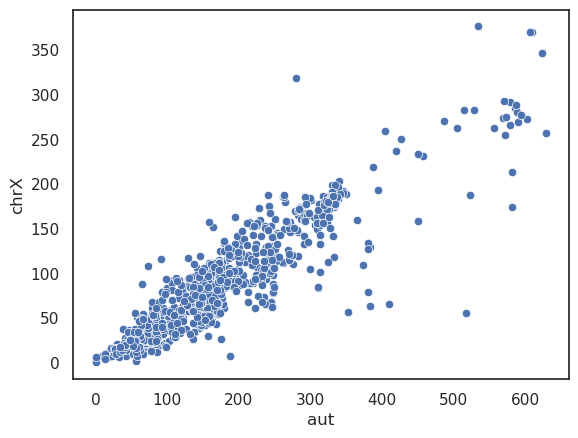

In [12]:
mean_het_df = all_het_df.groupby(["GVCF_ID","chr_type"])[["het"]].mean()
mean_het_df = mean_het_df.reset_index().pivot(columns="chr_type", index="GVCF_ID", values="het")
mean_het_df["X_a_ratio"] = mean_het_df.chrX/mean_het_df.aut
sns.scatterplot(mean_het_df, x="aut", y="chrX")

<Axes: xlabel='aut', ylabel='chrX'>

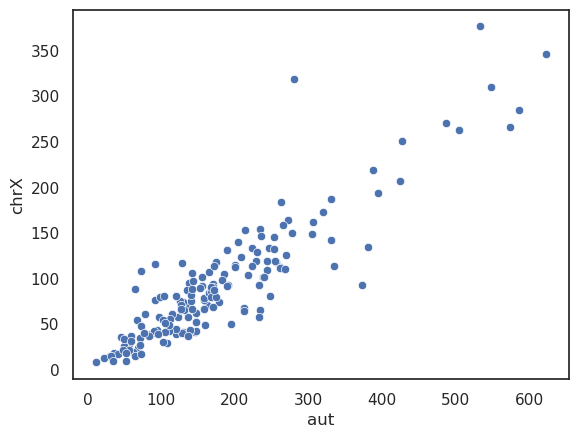

In [13]:
mean_het_df = all_het_df.groupby(["species","chr_type"])[["het"]].mean()
mean_het_df = mean_het_df.reset_index().pivot(columns="chr_type", index="species", values="het")
mean_het_df["X_a_ratio"] = mean_het_df.chrX/mean_het_df.aut
sns.scatterplot(mean_het_df, x="aut", y="chrX")

<Axes: xlabel='aut', ylabel='X_a_ratio'>

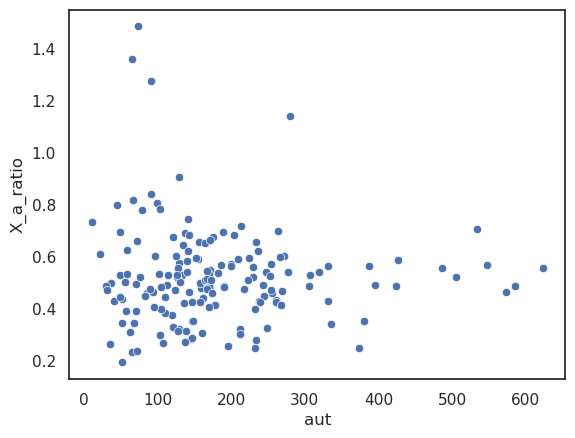

In [14]:
mean_het_df = all_het_df.groupby(["species","chr_type"])[["het"]].mean()
mean_het_df = mean_het_df.reset_index().pivot(columns="chr_type", index="species", values="het")
mean_het_df["X_a_ratio"] = mean_het_df.chrX/mean_het_df.aut
sns.scatterplot(mean_het_df, x="aut", y="X_a_ratio")

In [15]:
mean_het_df.sort_values("X_a_ratio")[:20]

chr_type,aut,chrX,X_a_ratio
species,,,
Cebus_imitator_ssp,51.841133,9.973129,0.192379
Mico_argentatus_ssp,64.651447,14.910596,0.230631
Saimiri_cassiquiarensis_ssp,72.659075,17.137131,0.235857
Mirza_zaza_ssp,232.553763,57.333333,0.246538
Hapalemur_griseus_ssp,373.178026,92.324916,0.247402
Trachypithecus_phayrei_ssp,195.318182,50.164748,0.256836
Trachypithecus_poliocephalus_ssp,35.083333,9.296128,0.264973
Macaca_arctoides_ssp,107.554816,28.859291,0.268322
Sapajus_apella_ssp,137.040625,37.291869,0.272123


In [16]:
mean_het_df.sort_values("X_a_ratio")[-30:-4]

chr_type,aut,chrX,X_a_ratio
species,,,
Daubentonia_madagascariensis_ssp,59.044839,36.967796,0.626097
Pithecia_albicans_ssp,135.164085,86.964715,0.643401
Chlorocebus_pygerythrus_ssp,165.046628,107.412355,0.650800
Ateles_geoffroyi_ssp,155.807542,101.992681,0.654607
Ateles_belzebuth_ssp,234.207298,153.915711,0.657177
Pan_paniscus_ssp,71.947955,47.544474,0.660818
Symphalangus_syndactylus_ssp,171.183743,113.280662,0.661749
Pan_troglodytes_ssp,120.603584,81.189949,0.673197
Chiropotes_sagulatus_ssp,174.665602,117.655121,0.673602


In [17]:
mean_het_df["binomial_name"] = [x[:-4] for x in mean_het_df.index]

In [18]:
all_inds10x.loc[all_inds10x.GVCF_FOLDER == "Piliocolobus_kirkii_ssp"]

,BIOSAMPLE_ID,PDGP_ID,GVCF_ID,SRA_SAMPLE_ID,BIOPROJECT_ID,BAM_FOLDER,GVCF_FOLDER,REFERENCE_FOLDER,GENUS,SPECIES,SUBSPECIES,REPORTED_SEX,GENETIC_SEX,AVG_COVERAGE_A,PROP_COVERED_A,AVG_COVERAGE_X,PROP_COVERED_X,AVG_COVERAGE_Y,PROP_COVERED_Y
2,SAMEA112482839,PD_0046,PD_0046,ERS14600190,PRJEB59576,Piliocolobus_kirkii_ssp,Piliocolobus_kirkii_ssp,Piliocolobus_tephrosceles_ssp,Piliocolobus,kirkii,ssp,M,F,35.765,0.965,34.562,0.977,24.528,0.887


Check mating system with statistics of variablity/inbreeding.

In [19]:
mating_vas = pd.read_excel("../data/PrimatePhenotypes_august.xlsx", sheet_name=8)
mating_vas

,binomial_name,Monogamous,Polygynous,Polygynandrous,Polyandrous,lowSC,highSC,consensus,comment,Juliana_Christina,genus_comment
0,Allenopithecus_nigroviridis,0,0,1,0,0,1,Polygynandrous,NaN,NaN,NaN
1,Allocebus_trichotis,2,1,0,0,3,0,Monogamous,NaN,NaN,NaN
2,Allochrocebus_lhoesti,0,3,0,0,3,0,Polygynous,NaN,NaN,NaN
3,Allochrocebus_preussi,0,1,0,0,1,0,Polygynous,NaN,NaN,NaN
4,Allochrocebus_solatus,0,1,0,0,1,0,Polygynous,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
311,Trachypithecus_phayrei,0,2,1,0,2,1,NaN,conflicting,NaN,NaN
312,Trachypithecus_pileatus,0,2,0,0,2,0,Polygynous,NaN,NaN,NaN
313,Trachypithecus_selangorensis,0,1,0,0,1,0,Polygynous,NaN,NaN,NaN
314,Varecia_rubra,0,1,1,0,1,1,NaN,conflicting,NaN,NaN


In [21]:
mean_het_df["strategy"] = mean_het_df.binomial_name.map(dict(zip(mating_vas.binomial_name, mating_vas.consensus)))

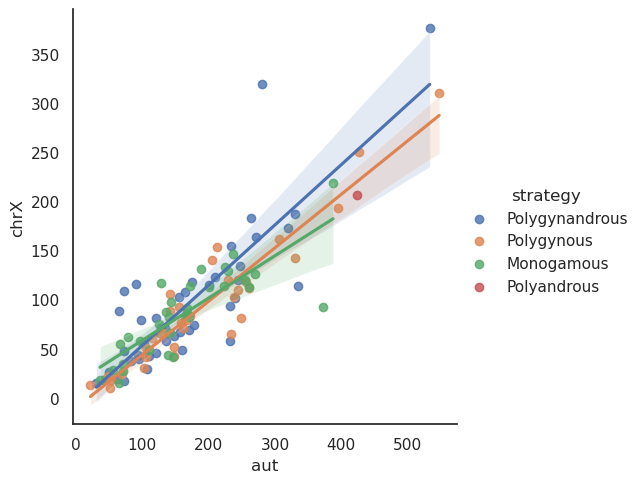

In [22]:
sns.lmplot(mean_het_df, x="aut", y="chrX", hue="strategy")

<Axes: ylabel='X_a_ratio'>

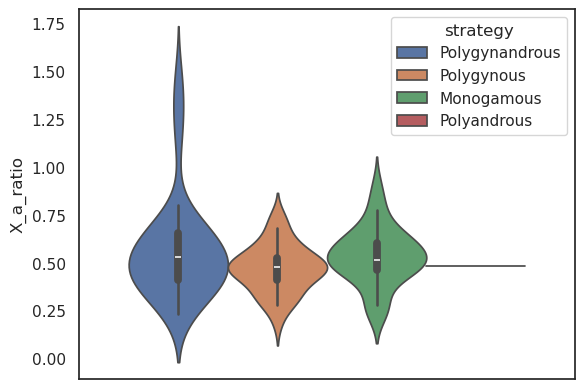

In [23]:
sns.violinplot(mean_het_df, y="X_a_ratio", hue="strategy")

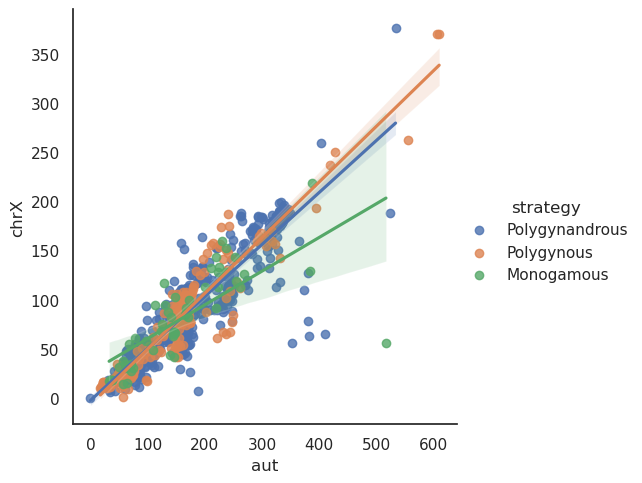

In [25]:
mean_het_ind_df = all_het_df.groupby(["species", "GVCF_ID","chr_type"])[["het"]].mean().reset_index()
mean_het_ind_df = mean_het_ind_df.reset_index().pivot(columns="chr_type", index=["species", "GVCF_ID"], values="het").reset_index()
mean_het_ind_df["X_a_ratio"] = mean_het_ind_df.chrX/mean_het_ind_df.aut
mean_het_ind_df["binomial_name"] = [x[:-4] for x in mean_het_ind_df.species]
mean_het_ind_df["strategy"] = mean_het_ind_df.binomial_name.map(dict(zip(mating_vas.binomial_name, mating_vas.consensus)))
mean_het_ind_df = mean_het_ind_df.loc[(mean_het_ind_df.X_a_ratio < 1) & (mean_het_ind_df.strategy != "Polyandrous")]
sns.lmplot(mean_het_ind_df, x="aut", y="chrX", hue="strategy")

In [26]:
mean_het_ind_df.strategy.isna().sum(), mean_het_df.strategy.isna().sum()

(169, 52)

In [27]:
all_het_df_x = all_het_df.loc[all_het_df.chr_type == "chrX"]
mean_het_ind_df["CV_X"] = (all_het_df_x.groupby(["species", "GVCF_ID","chr_type"])[["het"]].std() / all_het_df_x.groupby(["species", "GVCF_ID","chr_type"])[["het"]].mean()).reset_index()["het"]
all_het_df_aut = all_het_df.loc[all_het_df.chr_type == "chrX"]
mean_het_ind_df["CV_aut"] = (all_het_df_aut.groupby(["species", "GVCF_ID","chr_type"])[["het"]].std() / all_het_df_aut.groupby(["species", "GVCF_ID","chr_type"])[["het"]].mean()).reset_index()["het"]

<Axes: ylabel='CV_X'>

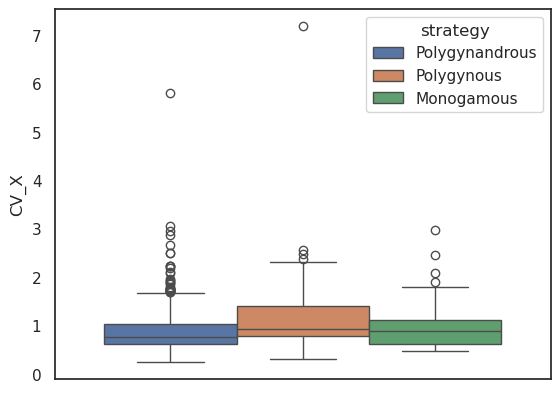

In [28]:
sns.boxplot(mean_het_ind_df.loc[mean_het_ind_df.CV_X < 10], y="CV_X", hue="strategy")

<Axes: xlabel='aut', ylabel='chrX'>

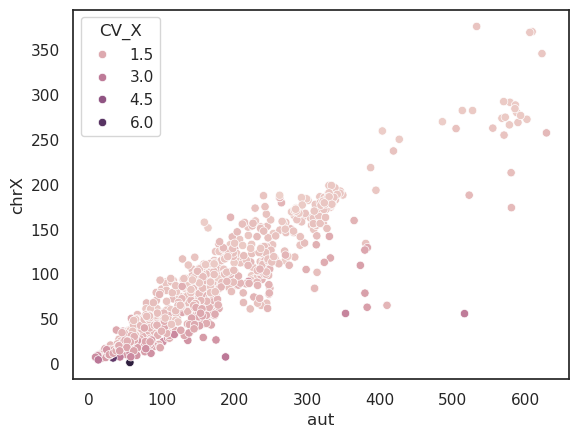

In [29]:
sns.scatterplot(mean_het_ind_df.loc[mean_het_ind_df.CV_X < 10], x="aut", y="chrX", hue="CV_X")

In [30]:
mean_het_ind_df

chr_type,species,GVCF_ID,aut,chrX,X_a_ratio,binomial_name,strategy,CV_X,CV_aut
0,Allenopithecus_nigroviridis_ssp,SAMN15801446,133.455986,70.601669,0.529026,Allenopithecus_nigroviridis,Polygynandrous,0.499462,0.499462
1,Allochrocebus_lhoesti_ssp,PD_0029,247.739443,77.381245,0.312349,Allochrocebus_lhoesti,Polygynous,1.018820,1.018820
2,Allochrocebus_lhoesti_ssp,SAMN37320022,249.027853,84.116564,0.337780,Allochrocebus_lhoesti,Polygynous,0.985339,0.985339
3,Allochrocebus_preussi_ssp,PD_0030,237.732230,101.969891,0.428927,Allochrocebus_preussi,Polygynous,0.816423,0.816423
4,Alouatta_belzebul_ssp,PD_0294,202.125000,87.115385,0.430998,Alouatta_belzebul,Polygynous,0.360819,0.360819
...,...,...,...,...,...,...,...,...,...
918,Trachypithecus_poliocephalus_ssp,SAMN09935393,57.750000,7.528474,0.130363,Trachypithecus_poliocephalus,NaN,2.457532,2.457532
919,Trachypithecus_poliocephalus_ssp,SAMN33960461,13.000000,4.116173,0.316629,Trachypithecus_poliocephalus,NaN,3.096243,3.096243
921,Varecia_variegata_ssp,SAMEA116330211,153.673049,56.222460,0.365858,Varecia_variegata,NaN,1.532870,1.532870
922,Varecia_variegata_ssp,SAMN29758785,191.044998,119.385027,0.624905,Varecia_variegata,NaN,0.663027,0.663027


In [31]:
testes_vas = pd.read_excel("../data/PrimatePhenotypes_august.xlsx", sheet_name=3)
grouped_testes = testes_vas.loc[testes_vas.suggest_to_drop == 0].groupby(["binomial_name"])["testes_mass_combined_g"].mean().reset_index()
body_vas = pd.read_excel("../data/PrimatePhenotypes_august.xlsx", sheet_name=5)
grouped_body = body_vas.groupby(["binomial_name"])["body_mass_m"].mean().reset_index()
testes_body = grouped_testes.merge(grouped_body, on=["binomial_name"])
testes_body["Testes_Percentage"] = testes_body.testes_mass_combined_g/testes_body.body_mass_m


In [34]:
mean_het_testes = mean_het_df.merge(testes_body, on="binomial_name", how="outer")

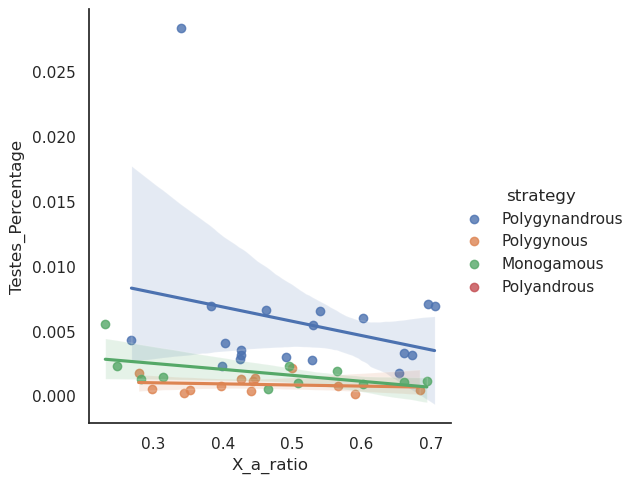

In [38]:
sns.lmplot(mean_het_testes, x="X_a_ratio", y="Testes_Percentage", hue="strategy")

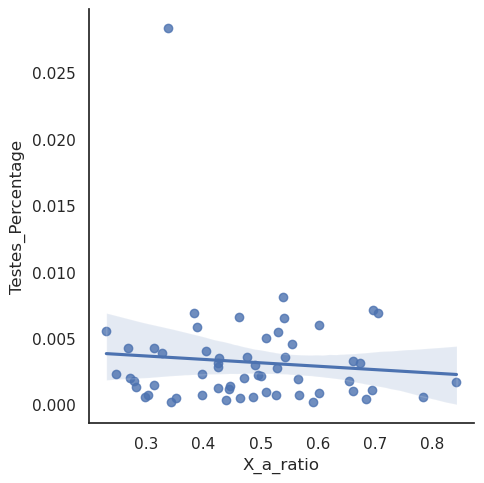

In [36]:
sns.lmplot(mean_het_testes, x="X_a_ratio", y="Testes_Percentage")

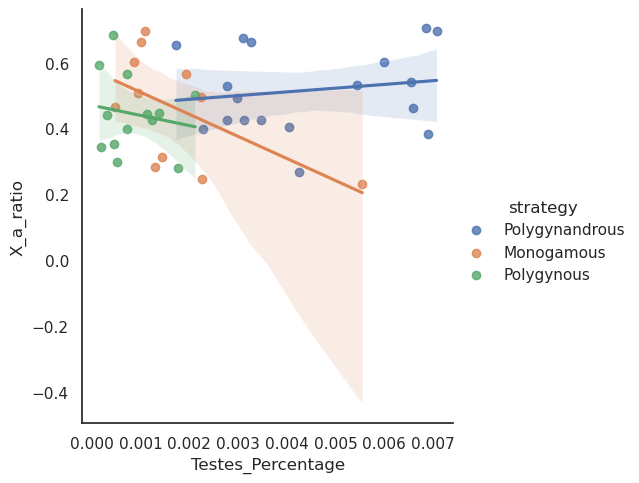

In [50]:
sns.lmplot(mean_het_testes.loc[mean_het_testes.Testes_Percentage < 0.020], y="X_a_ratio", x="Testes_Percentage",
          hue="strategy")

In [57]:
mean_het_testes.sort_values("Testes_Percentage", ascending=False)

,aut,chrX,X_a_ratio,binomial_name,strategy,testes_mass_combined_g,body_mass_m,Testes_Percentage
127,NaN,NaN,NaN,Microcebus_myoxinus,NaN,1.38,30.850000,0.044733
122,NaN,NaN,NaN,Microcebus_berthae,NaN,1.25,31.000000,0.040323
126,335.322961,113.702214,0.339083,Microcebus_murinus,Polygynandrous,1.87,65.940847,0.028359
132,NaN,NaN,NaN,Mirza_coquereli,NaN,7.22,309.103105,0.023358
67,NaN,NaN,NaN,Eulemur_cinereiceps,NaN,27.23,2061.500000,0.013209
...,...,...,...,...,...,...,...,...
195,82.826897,36.970514,0.446359,Saimiri_ustus,Polygynandrous,NaN,NaN,NaN
203,52.363636,17.983824,0.343441,Trachypithecus_geei,Polygynous,NaN,NaN,NaN
205,195.318182,50.164748,0.256836,Trachypithecus_phayrei,NaN,NaN,NaN,NaN
206,35.083333,9.296128,0.264973,Trachypithecus_poliocephalus,NaN,NaN,NaN,NaN


In [44]:
mean_het_testes

,aut,chrX,X_a_ratio,binomial_name,strategy,testes_mass_combined_g,body_mass_m,Testes_Percentage
0,133.455986,70.601669,0.529026,Allenopithecus_nigroviridis,Polygynandrous,16.960,6130.000000,0.002767
1,248.383648,80.748904,0.325098,Allochrocebus_lhoesti,Polygynous,NaN,NaN,NaN
2,237.732230,101.969891,0.428927,Allochrocebus_preussi,Polygynous,NaN,NaN,NaN
3,229.031250,119.217949,0.520531,Alouatta_belzebul,Polygynous,NaN,NaN,NaN
4,NaN,NaN,NaN,Alouatta_caraya,NaN,18.370,6472.500000,0.002838
...,...,...,...,...,...,...,...,...
204,NaN,NaN,NaN,Trachypithecus_obscurus,NaN,5.820,7672.333333,0.000759
205,195.318182,50.164748,0.256836,Trachypithecus_phayrei,NaN,NaN,NaN,NaN
206,35.083333,9.296128,0.264973,Trachypithecus_poliocephalus,NaN,NaN,NaN,NaN
207,172.359023,87.803743,0.509424,Varecia_variegata,NaN,17.675,3537.524050,0.004996


In [42]:
import statsmodels.formula.api as smf
glm_results = smf.glm(formula = "chrX ~ aut",
                      data=mean_het_testes).fit()
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   chrX   No. Observations:                  166
Model:                            GLM   Df Residuals:                      164
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          811.50
Method:                          IRLS   Log-Likelihood:                -790.55
Date:                Tue, 07 Oct 2025   Deviance:                   1.3309e+05
Time:                        09:19:40   Pearson chi2:                 1.33e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9878
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6085      4.086     -0.149      0.882      -8.616       7.399
aut            0.5180      0.019     27.044      0.000       0.480       0.556
==============================================================================
"""

In [43]:
import statsmodels.formula.api as smf
glm_results = smf.glm(formula = "chrX ~ aut * strategy",
                      data=mean_het_testes).fit()
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   chrX   No. Observations:                  114
Model:                            GLM   Df Residuals:                      107
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                          954.78
Method:                          IRLS   Log-Likelihood:                -549.25
Date:                Tue, 07 Oct 2025   Deviance:                   1.0216e+05
Time:                        09:19:52   Pearson chi2:                 1.02e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9573
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         15.4080     11.970      1.287      0.198      -8.052      38.868
strategy[T.Polyandrous]         4.833e-05      0.000      0.244      0.807      -0.000       0.000
strategy[T.Polygynandrous]       -23.4468     15.057     -1.557      0.119     -52.958       6.064
strategy[T.Polygynous]           -26.0351     15.808     -1.647      0.100     -57.018       4.948
aut                                0.4299      0.065      6.621      0.000       0.303       0.557
aut:strategy[T.Polyandrous]        0.0205      0.084      0.244      0.807      -0.144       0.185
aut:strategy[T.Polygynandrous]     0.1828      0.080      2.274      0.023       0.025       0.340
aut:strategy[T.Polygynous]         0.1138      0.080      1.419      0.156      -0.043       0.271
==================================================================================================
"""

In [45]:
import statsmodels.formula.api as smf
glm_results = smf.glm(formula = "chrX ~ aut * Testes_Percentage",
                      data=mean_het_testes).fit()
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   chrX   No. Observations:                   58
Model:                            GLM   Df Residuals:                       54
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          831.87
Method:                          IRLS   Log-Likelihood:                -275.21
Date:                Tue, 07 Oct 2025   Deviance:                       44921.
Time:                        09:22:54   Pearson chi2:                 4.49e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9935
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -7.0043     11.682     -0.600      0.549     -29.901      15.893
aut                       0.5572      0.049     11.298      0.000       0.461       0.654
Testes_Percentage     -2344.8759   3149.929     -0.744      0.457   -8518.623    3828.871
aut:Testes_Percentage     4.1889     10.349      0.405      0.686     -16.094      24.472
=========================================================================================
"""